In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from time import time
import pandas as pd
import numpy as np

In [2]:
#CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [3]:
# dense 
model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(8))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


In [6]:
img = load_img('data2/train/Lion/lion007.jpg') # this is a PIL image
x = img_to_array(img) # this is a Numpy array with shape (3, 150, 150)
print(x.shape)
x = x.reshape((1,) + x.shape) # this is a Numpy array with shape (1, 3, 150, 150)
print(x.shape)
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='data2/preview', save_prefix='lion', save_format='jpeg'):
  i += 1
  if i > 20:
    break # otherwise the generator would loop indefinitely

(177, 144, 3)
(1, 177, 144, 3)


In [7]:
model.compile(loss='categorical_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])

In [8]:
batch_size = 50 #16
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

In [9]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
'data2/train', # this is the target directory
classes = ["Bear","Duck","Eagle","Elephant","Lion","Rabbit","Sheep","Wolf"],
target_size=(150, 150), # all images will be resized to 150x150
batch_size=batch_size,
class_mode='categorical') # since we use binary_crossentropy loss, we need binary labels

In [10]:
# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
'data2/train', # this is the target directory
classes = ["Bear","Duck","Eagle","Elephant","Lion","Rabbit","Sheep","Wolf"],
target_size=(150, 150), # all images will be resized to 150x150
batch_size=batch_size,
class_mode='categorical') # since we use binary_crossentropy loss, we need binary labels

Found 650 images belonging to 8 classes.


In [11]:
# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
'data2/validation',
classes = ["Bear","Duck","Eagle","Elephant","Lion","Rabbit","Sheep","Wolf"],
target_size=(150, 150),
batch_size=batch_size,
class_mode='categorical')

Found 157 images belonging to 8 classes.


In [12]:
import os
#current_path = os.path.join(src, animal)
classes = ["Bear","Duck","Eagle","Elephant","Lion","Rabbit","Sheep","Wolf"]
list_bear=[] 
for i in classes :
    for file in os.listdir("data2/train/"+i):
        list_bear.append(file)
    n = len(list_bear)
        #print(n)
    print ('{} = {} images'.format(i,n) )

Bear = 80 images
Duck = 159 images
Eagle = 246 images
Elephant = 326 images
Lion = 410 images
Rabbit = 490 images
Sheep = 570 images
Wolf = 650 images


In [13]:
print("train_generator : ", type(train_generator))#.shape)
#print("validation_data : ", validation_data.shape)

train_generator :  <class 'tensorflow.python.keras.preprocessing.image.DirectoryIterator'>


In [14]:
history = model.fit_generator(
train_generator,
#steps_per_epoch= 2 , # // batch_size,
epochs=100,#70, #50,
validation_data=validation_generator,
#validation_steps= 2 
) # // batch_size)
model.save_weights('data2/first_try.h5') # always save your weights after training or during training

/home/ines/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
13/13 [==============================] - 62s 4s/step - loss: 2.2143 - accuracy: 0.1590 - val_loss: 1.9997 - val_accuracy: 0.1465
Epoch 2/100
13/13 [==============================] - 51s 4s/step - loss: 2.0369 - accuracy: 0.2231 - val_loss: 1.8276 - val_accuracy: 0.3185
Epoch 3/100
13/13 [==============================] - 52s 4s/step - loss: 1.7067 - accuracy: 0.3873 - val_loss: 1.4449 - val_accuracy: 0.4904
Epoch 4/100
13/13 [==============================] - 52s 4s/step - loss: 1.5389 - accuracy: 0.4743 - val_loss: 1.6524 - val_accuracy: 0.4076
Epoch 5/100
13/13 [==============================] - 52s 4s/step - loss: 1.4701 - accuracy: 0.4997 - val_loss: 1.2184 - val_accuracy: 0.5924
Epoch 6/100
13/13 [==============================] - 53s 4s/step - loss: 1.2654 - accuracy: 0.5658 - val_loss: 1.0017 - val_accuracy: 0.6688
Epoch 7/100
13/13 [==============================] - 51s 4s/step - loss: 1.1642 - accuracy: 0.6025 - val_loss: 1.0754 - val_accuracy: 0.6433
Epoch 8/100
1

Epoch 59/100
13/13 [==============================] - 54s 4s/step - loss: 0.2127 - accuracy: 0.9291 - val_loss: 0.6530 - val_accuracy: 0.8535
Epoch 60/100
13/13 [==============================] - 53s 4s/step - loss: 0.1945 - accuracy: 0.9316 - val_loss: 0.5509 - val_accuracy: 0.8344
Epoch 61/100
13/13 [==============================] - 52s 4s/step - loss: 0.1773 - accuracy: 0.9417 - val_loss: 0.5834 - val_accuracy: 0.8726
Epoch 62/100
13/13 [==============================] - 52s 4s/step - loss: 0.2435 - accuracy: 0.9144 - val_loss: 0.5284 - val_accuracy: 0.8726
Epoch 63/100
13/13 [==============================] - 52s 4s/step - loss: 0.2276 - accuracy: 0.9447 - val_loss: 0.5634 - val_accuracy: 0.8662
Epoch 64/100
13/13 [==============================] - 53s 4s/step - loss: 0.1523 - accuracy: 0.9440 - val_loss: 0.5288 - val_accuracy: 0.8535
Epoch 65/100
13/13 [==============================] - 52s 4s/step - loss: 0.1953 - accuracy: 0.9306 - val_loss: 0.6988 - val_accuracy: 0.8408
Epoch 

In [15]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

Training Accuracy: 0.9969
Testing Accuracy:  0.8662


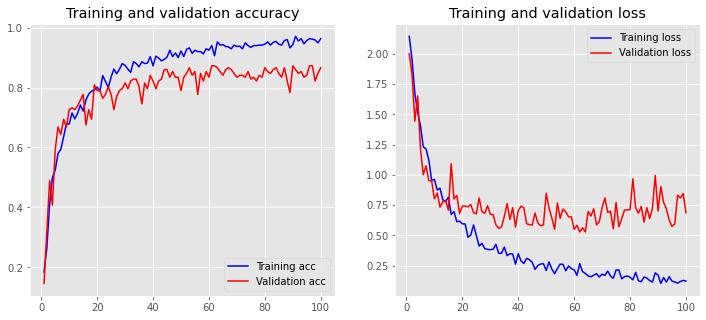

In [16]:
loss, accuracy = model.evaluate(train_generator, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(validation_generator, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

### epochs = 70
Training Accuracy: 0.9908  
Testing Accuracy:  0.8153  
prediction juste 4/6

### epochs = 100
Training Accuracy: 0.9969
Testing Accuracy:  0.8662  
prediction juste 2/6


In [17]:
y_pred = model.predict(validation_generator)
y_pred

array([[9.8231965e-01, 3.9528339e-07, 5.5656547e-04, ..., 4.0687835e-03,
        3.7385547e-05, 4.4123494e-04],
       [9.9873322e-01, 1.0719083e-06, 1.3535778e-04, ..., 6.7485985e-04,
        8.3121822e-06, 8.8542271e-05],
       [1.2439113e-05, 4.0428327e-09, 6.6183791e-05, ..., 1.1784330e-10,
        4.8640309e-06, 1.2619830e-10],
       ...,
       [9.9917185e-01, 1.0003391e-07, 9.7559598e-05, ..., 4.9957157e-06,
        1.1510018e-06, 2.9994968e-07],
       [1.0000000e+00, 1.1415660e-14, 2.3977755e-09, ..., 7.3347373e-09,
        2.6192421e-11, 1.8267681e-08],
       [7.0497833e-08, 1.3830181e-15, 5.5745880e-10, ..., 2.9899143e-16,
        8.3454112e-11, 5.3523128e-14]], dtype=float32)

In [37]:
X_train, y_train = next(train_generator)
X_test, y_test = next(validation_generator)

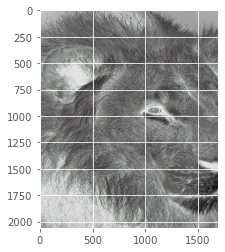

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as img

image = img.imread('data2/validation/Lion/lionlh173.jpg')
plt.imshow(image)
plt.show()

In [19]:
validation_generator.class_indices

{'Bear': 0,
 'Duck': 1,
 'Eagle': 2,
 'Elephant': 3,
 'Lion': 4,
 'Rabbit': 5,
 'Sheep': 6,
 'Wolf': 7}

In [57]:
import cv2
import numpy as np 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
#model = Sequential()

#model =load_model('first_try.h5')
# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])
def prediction(model,image):
    image = cv2.imread(image)
    img = cv2.resize(image,(150,150))
    img = np.reshape(img,[1,150,150,3])
    classes = model.predict_classes(img)
    dict_class = validation_generator.class_indices
    dct = {v: k for k, v in dict_class.items()}
    print(dct)
    #print(classes)
    indice = classes[0]#[0]
    print('indice = ',indice)
    print('class = ', dct[indice])
#     indice = np.argmax
#     for k,v in dct.items():
#         pred_class = dct[indice]
    plt.imshow(image)
    plt.title(dct[indice])
    plt.show()
    return "prediction class = {}".format(dct[indice])

{0: 'Bear', 1: 'Duck', 2: 'Eagle', 3: 'Elephant', 4: 'Lion', 5: 'Rabbit', 6: 'Sheep', 7: 'Wolf'}
indice =  6
class =  Sheep


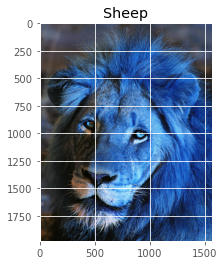

'prediction class = Sheep'

In [28]:
image = 'data2/validation/Lion/lionlh175.jpg'
prediction(image)

{0: 'Bear', 1: 'Duck', 2: 'Eagle', 3: 'Elephant', 4: 'Lion', 5: 'Rabbit', 6: 'Sheep', 7: 'Wolf'}
indice =  3
class =  Elephant


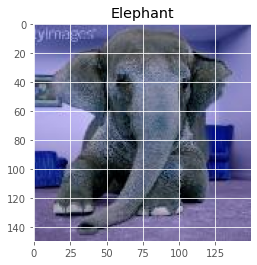

'prediction class = Elephant'

In [29]:
image = 'data2/validation/Elephant/0000000087.jpg'
prediction(image)

{0: 'Bear', 1: 'Duck', 2: 'Eagle', 3: 'Elephant', 4: 'Lion', 5: 'Rabbit', 6: 'Sheep', 7: 'Wolf'}
indice =  0
class =  Bear


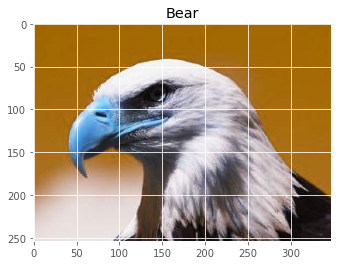

'prediction class = Bear'

In [30]:
image = 'data2/validation/Eagle/j0178767.jpg'
prediction(image)

{0: 'Bear', 1: 'Duck', 2: 'Eagle', 3: 'Elephant', 4: 'Lion', 5: 'Rabbit', 6: 'Sheep', 7: 'Wolf'}
indice =  2
class =  Eagle


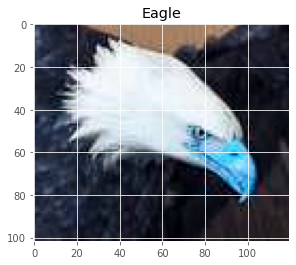

'prediction class = Eagle'

In [31]:
image = 'data2/validation/Eagle/homer-eagles-3488-1.jpg'
prediction(image)

{0: 'Bear', 1: 'Duck', 2: 'Eagle', 3: 'Elephant', 4: 'Lion', 5: 'Rabbit', 6: 'Sheep', 7: 'Wolf'}
indice =  6
class =  Sheep


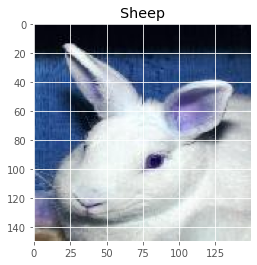

'prediction class = Sheep'

In [32]:
image = 'data2/validation/Rabbit/rabbitfrontalfrontal0086.jpg'
prediction(image)

{0: 'Bear', 1: 'Duck', 2: 'Eagle', 3: 'Elephant', 4: 'Lion', 5: 'Rabbit', 6: 'Sheep', 7: 'Wolf'}
indice =  2
class =  Eagle


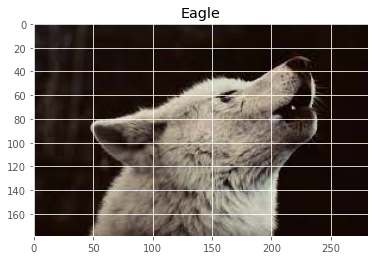

'prediction class = Eagle'

In [33]:
#image = 'data2/validation/Bear/bearfrontal0092.jpg'
#image = 'data2/validation/Bear/bearfrontal0082.jpg'
#image = 'data2/image_google/lion1.jpeg'
#image = 'data2/image_google/lion2.jpeg'
#image = 'data2/image_google/lion3.jpeg'
image = 'data2/image_google/wolf2.jpeg'
prediction(image)

y_pred[0] =  [0. 0. 0. 0. 0. 0. 1. 0.]
ind_class =  6
classe =  Sheep


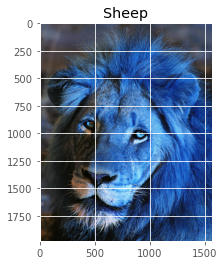

In [34]:
#image = 'data2/validation/Eagle/j0178767.jpg'
#image = 'data2/validation/Elephant/0000000087.jpg'
image = 'data2/validation/Lion/lionlh175.jpg'

image = cv2.imread(image)
img = cv2.resize(image,(150,150))
img = np.reshape(img,[1,150,150,3])
#classes = model.predict_classes(img)
y_pred = model.predict(img)
ind_class = np.argmax(y_pred[0])
print('y_pred[0] = ',y_pred[0])
print('ind_class = ',ind_class)
#dict_class = validation_generator.class_indices
liste_class = ["Bear","Duck","Eagle","Elephant","Lion","Rabbit","Sheep","Wolf"]
classe = liste_class[ind_class]
print('classe = ', classe)
#dct = {v: k for k, v in dict_class.items()}
#print(dct)
#print(classes)
#indice = classes[0]#[0]
#print('indice = ',indice)
#print('class = ', dct[indice])
#     indice = np.argmax
#     for k,v in dct.items():
#         pred_class = dct[indice]
plt.imshow(image)
plt.title(classe)
plt.show()

# Optimisation des hyperparamètres

In [59]:
X_train, y_train = next(train_generator)
X_test, y_test = next(validation_generator)

In [50]:
def create_model(num_filters,num_filters1, kernel_size, optimizer):#, Dropout):
    #CNN
    model = Sequential()
    model.add(Conv2D(num_filters, kernel_size, input_shape=(150, 150, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(num_filters1, kernel_size))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(num_filters1, kernel_size))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # dense 
    model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(num_filters1))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(8))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
    optimizer= optimizer,
    metrics=['accuracy'])
    return model

In [51]:
param_grid = dict(num_filters=[32, 64],
                  num_filters1=[32, 64, 128],
                  kernel_size=[(5,5),(3,3),(2,2)],
                 optimizer=['rmsprop', 'adam', 'sgd'])
                 #,Dropout=[0.5, 0.2])

In [52]:
# train_np = np.array(train_generator)
# validation_np =  np.array(validation_generator)

In [53]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from time import time

epochs = 70
start = time()
model = KerasClassifier(build_fn=create_model,
                            epochs=epochs, batch_size=16,
                            verbose=True)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                          cv=4, verbose=0, n_iter=5)
grid_result = grid.fit(X_train, y_train)

end = time()
t = abs(start - end)
print("Time = ", t)
# Evaluate testing set
test_accuracy = grid.score(X_test, y_test)
end = time()
t = abs(start - end)
print("Time = ", t)
print('accuracy_test = ',test_accuracy)

print('best socre = ', grid_result.best_score_)
print('best param = ',grid_result.best_params_)


Epoch 1/70
3/3 [==============================] - 7s 2s/step - loss: 2.0492 - accuracy: 0.1535
Epoch 2/70
3/3 [==============================] - 6s 2s/step - loss: 1.9831 - accuracy: 0.3070
Epoch 3/70
3/3 [==============================] - 7s 2s/step - loss: 2.0202 - accuracy: 0.1670
Epoch 4/70
3/3 [==============================] - 7s 2s/step - loss: 1.9500 - accuracy: 0.2679
Epoch 5/70
3/3 [==============================] - 7s 2s/step - loss: 1.9582 - accuracy: 0.2992
Epoch 6/70
3/3 [==============================] - 6s 2s/step - loss: 1.9519 - accuracy: 0.2971
Epoch 7/70
3/3 [==============================] - 6s 2s/step - loss: 1.8038 - accuracy: 0.2310
Epoch 8/70
3/3 [==============================] - 6s 2s/step - loss: 1.9317 - accuracy: 0.2253
Epoch 9/70
3/3 [==============================] - 6s 2s/step - loss: 1.9578 - accuracy: 0.3361
Epoch 10/70
3/3 [==============================] - 6s 2s/step - loss: 1.9319 - accuracy: 0.3788
Epoch 11/70
3/3 [==============================] 

3/3 [==============================] - 5s 2s/step - loss: 1.9750 - accuracy: 0.3063
Epoch 30/70
3/3 [==============================] - 5s 1s/step - loss: 1.6189 - accuracy: 0.4293
Epoch 31/70
3/3 [==============================] - 5s 1s/step - loss: 1.5179 - accuracy: 0.4478
Epoch 32/70
3/3 [==============================] - 5s 1s/step - loss: 1.6102 - accuracy: 0.4371
Epoch 33/70
3/3 [==============================] - 5s 1s/step - loss: 1.7734 - accuracy: 0.3692
Epoch 34/70
3/3 [==============================] - 6s 2s/step - loss: 1.4971 - accuracy: 0.5053
Epoch 35/70
3/3 [==============================] - 5s 2s/step - loss: 1.6174 - accuracy: 0.4708
Epoch 36/70
3/3 [==============================] - 5s 1s/step - loss: 1.5954 - accuracy: 0.4190
Epoch 37/70
3/3 [==============================] - 5s 2s/step - loss: 1.4380 - accuracy: 0.5263
Epoch 38/70
3/3 [==============================] - 5s 1s/step - loss: 1.8110 - accuracy: 0.3614
Epoch 39/70
3/3 [==============================] - 5

3/3 [==============================] - 6s 2s/step - loss: 1.3575 - accuracy: 0.5011
Epoch 51/70
3/3 [==============================] - 6s 2s/step - loss: 1.5379 - accuracy: 0.3959
Epoch 52/70
3/3 [==============================] - 6s 2s/step - loss: 1.3502 - accuracy: 0.4911
Epoch 53/70
3/3 [==============================] - 6s 2s/step - loss: 1.1162 - accuracy: 0.5494
Epoch 54/70
3/3 [==============================] - 6s 2s/step - loss: 1.2793 - accuracy: 0.4875
Epoch 55/70
3/3 [==============================] - 6s 2s/step - loss: 1.1308 - accuracy: 0.6681
Epoch 56/70
3/3 [==============================] - 6s 2s/step - loss: 1.2453 - accuracy: 0.5785
Epoch 57/70
3/3 [==============================] - 6s 2s/step - loss: 0.9010 - accuracy: 0.7321
Epoch 58/70
3/3 [==============================] - 6s 2s/step - loss: 0.7906 - accuracy: 0.7029
Epoch 59/70
3/3 [==============================] - 6s 2s/step - loss: 0.9033 - accuracy: 0.6603
Epoch 60/70
3/3 [==============================] - 6

3/3 [==============================] - 6s 2s/step - loss: 1.2663 - accuracy: 0.6233
Epoch 58/70
3/3 [==============================] - 6s 2s/step - loss: 1.3413 - accuracy: 0.4172
Epoch 59/70
3/3 [==============================] - 6s 2s/step - loss: 1.6014 - accuracy: 0.2289
Epoch 60/70
3/3 [==============================] - 6s 2s/step - loss: 1.3912 - accuracy: 0.4521
Epoch 61/70
3/3 [==============================] - 6s 2s/step - loss: 1.0903 - accuracy: 0.5792
Epoch 62/70
3/3 [==============================] - 6s 2s/step - loss: 1.6991 - accuracy: 0.3397
Epoch 63/70
3/3 [==============================] - 6s 2s/step - loss: 1.5223 - accuracy: 0.3824
Epoch 64/70
3/3 [==============================] - 6s 2s/step - loss: 1.1842 - accuracy: 0.6191
Epoch 65/70
3/3 [==============================] - 6s 2s/step - loss: 1.1521 - accuracy: 0.5494
Epoch 66/70
3/3 [==============================] - 6s 2s/step - loss: 1.3137 - accuracy: 0.5359
Epoch 67/70
3/3 [==============================] - 6

3/3 [==============================] - 6s 2s/step - loss: 1.0578 - accuracy: 0.6073
Epoch 65/70
3/3 [==============================] - 6s 2s/step - loss: 0.8671 - accuracy: 0.6805
Epoch 66/70
3/3 [==============================] - 7s 2s/step - loss: 1.4740 - accuracy: 0.5234
Epoch 67/70
3/3 [==============================] - 6s 2s/step - loss: 1.0061 - accuracy: 0.7015
Epoch 68/70
3/3 [==============================] - 7s 2s/step - loss: 1.0741 - accuracy: 0.5498
Epoch 69/70
3/3 [==============================] - 6s 2s/step - loss: 1.3128 - accuracy: 0.5053
Epoch 70/70
1/1 [==============================] - 1s 932ms/step - loss: 2.3876 - accuracy: 0.2500
Epoch 1/70
3/3 [==============================] - 8s 2s/step - loss: 2.0658 - accuracy: 0.0366
Epoch 2/70
3/3 [==============================] - 6s 2s/step - loss: 2.0638 - accuracy: 0.1151
Epoch 3/70
3/3 [==============================] - 6s 2s/step - loss: 2.0646 - accuracy: 0.2225
Epoch 4/70
3/3 [==============================] - 7s

1/1 [==============================] - 1s 938ms/step - loss: 2.1881 - accuracy: 0.3333
Epoch 1/70
3/3 [==============================] - 10s 2s/step - loss: 2.0521 - accuracy: 0.2175
Epoch 2/70
3/3 [==============================] - 8s 2s/step - loss: 2.0242 - accuracy: 0.1962
Epoch 3/70
3/3 [==============================] - 8s 2s/step - loss: 2.0153 - accuracy: 0.1883
Epoch 4/70
3/3 [==============================] - 8s 2s/step - loss: 1.9630 - accuracy: 0.2679
Epoch 5/70
3/3 [==============================] - 8s 2s/step - loss: 2.0367 - accuracy: 0.2154
Epoch 6/70
3/3 [==============================] - 8s 2s/step - loss: 1.9119 - accuracy: 0.2779
Epoch 7/70
3/3 [==============================] - 9s 2s/step - loss: 1.9811 - accuracy: 0.2325
Epoch 8/70
3/3 [==============================] - 8s 2s/step - loss: 2.0391 - accuracy: 0.2310
Epoch 9/70
3/3 [==============================] - 8s 2s/step - loss: 1.8088 - accuracy: 0.3710
Epoch 10/70
3/3 [==============================] - 8s 2s/

3/3 [==============================] - 9s 2s/step - loss: 2.0008 - accuracy: 0.2565
Epoch 8/70
3/3 [==============================] - 8s 2s/step - loss: 1.9938 - accuracy: 0.2196
Epoch 9/70
3/3 [==============================] - 9s 3s/step - loss: 2.0045 - accuracy: 0.0583
Epoch 10/70
3/3 [==============================] - 8s 2s/step - loss: 1.9829 - accuracy: 0.0874
Epoch 11/70
3/3 [==============================] - 8s 2s/step - loss: 2.0113 - accuracy: 0.2310
Epoch 12/70
3/3 [==============================] - 8s 2s/step - loss: 2.0060 - accuracy: 0.1592
Epoch 13/70
3/3 [==============================] - 8s 2s/step - loss: 1.9276 - accuracy: 0.1826
Epoch 14/70
3/3 [==============================] - 8s 2s/step - loss: 1.9569 - accuracy: 0.1457
Epoch 15/70
3/3 [==============================] - 8s 2s/step - loss: 1.9231 - accuracy: 0.1805
Epoch 16/70
3/3 [==============================] - 8s 2s/step - loss: 1.9376 - accuracy: 0.2289
Epoch 17/70
3/3 [==============================] - 8s 

3/3 [==============================] - 8s 2s/step - loss: 2.0186 - accuracy: 0.1073
Epoch 15/70
3/3 [==============================] - 8s 3s/step - loss: 1.8809 - accuracy: 0.2356
Epoch 16/70
3/3 [==============================] - 9s 2s/step - loss: 2.0241 - accuracy: 0.3454
Epoch 17/70
3/3 [==============================] - 8s 2s/step - loss: 1.8622 - accuracy: 0.4552
Epoch 18/70
3/3 [==============================] - 8s 2s/step - loss: 1.9527 - accuracy: 0.2068
Epoch 19/70
3/3 [==============================] - 8s 2s/step - loss: 1.9604 - accuracy: 0.3561
Epoch 20/70
3/3 [==============================] - 8s 2s/step - loss: 1.9258 - accuracy: 0.2459
Epoch 21/70
3/3 [==============================] - 8s 2s/step - loss: 1.9604 - accuracy: 0.1493
Epoch 22/70
3/3 [==============================] - 8s 2s/step - loss: 1.9006 - accuracy: 0.3170
Epoch 23/70
3/3 [==============================] - 9s 2s/step - loss: 1.8554 - accuracy: 0.3166
Epoch 24/70
3/3 [==============================] - 8

3/3 [==============================] - 8s 2s/step - loss: 1.9826 - accuracy: 0.1887
Epoch 22/70
3/3 [==============================] - 9s 2s/step - loss: 1.8777 - accuracy: 0.2595
Epoch 23/70
3/3 [==============================] - 8s 2s/step - loss: 1.9694 - accuracy: 0.1390
Epoch 24/70
3/3 [==============================] - 8s 2s/step - loss: 1.9790 - accuracy: 0.1887
Epoch 25/70
3/3 [==============================] - 8s 2s/step - loss: 1.9066 - accuracy: 0.2278
Epoch 26/70
3/3 [==============================] - 8s 2s/step - loss: 1.7876 - accuracy: 0.3298
Epoch 27/70
3/3 [==============================] - 9s 3s/step - loss: 1.8929 - accuracy: 0.3141
Epoch 28/70
3/3 [==============================] - 8s 2s/step - loss: 1.9531 - accuracy: 0.3298
Epoch 29/70
3/3 [==============================] - 8s 2s/step - loss: 1.8496 - accuracy: 0.3692
Epoch 30/70
3/3 [==============================] - 8s 2s/step - loss: 1.8410 - accuracy: 0.2410
Epoch 31/70
3/3 [==============================] - 8

3/3 [==============================] - 4s 1s/step - loss: 0.3258 - accuracy: 0.9048
Epoch 29/70
3/3 [==============================] - 4s 1s/step - loss: 0.2564 - accuracy: 0.9069
Epoch 30/70
3/3 [==============================] - 4s 1s/step - loss: 0.1020 - accuracy: 0.9787
Epoch 31/70
3/3 [==============================] - 4s 1s/step - loss: 0.3246 - accuracy: 0.8309
Epoch 32/70
3/3 [==============================] - 4s 1s/step - loss: 0.1848 - accuracy: 0.9495
Epoch 33/70
3/3 [==============================] - 4s 1s/step - loss: 0.1608 - accuracy: 0.9225
Epoch 34/70
3/3 [==============================] - 4s 1s/step - loss: 0.0661 - accuracy: 0.9787
Epoch 35/70
3/3 [==============================] - 4s 1s/step - loss: 0.1429 - accuracy: 0.9261
Epoch 36/70
3/3 [==============================] - 4s 1s/step - loss: 0.1580 - accuracy: 0.9787
Epoch 37/70
3/3 [==============================] - 4s 1s/step - loss: 0.1638 - accuracy: 0.9630
Epoch 38/70
3/3 [==============================] - 4

3/3 [==============================] - 4s 1s/step - loss: 0.4302 - accuracy: 0.8174
Epoch 36/70
3/3 [==============================] - 5s 1s/step - loss: 0.3877 - accuracy: 0.8095
Epoch 37/70
3/3 [==============================] - 4s 1s/step - loss: 0.5713 - accuracy: 0.7882
Epoch 38/70
3/3 [==============================] - 4s 1s/step - loss: 0.4302 - accuracy: 0.7747
Epoch 39/70
3/3 [==============================] - 4s 1s/step - loss: 0.3144 - accuracy: 0.8934
Epoch 40/70
3/3 [==============================] - 4s 1s/step - loss: 0.5123 - accuracy: 0.7690
Epoch 41/70
3/3 [==============================] - 4s 1s/step - loss: 0.2613 - accuracy: 0.8777
Epoch 42/70
3/3 [==============================] - 4s 1s/step - loss: 0.1994 - accuracy: 0.9204
Epoch 43/70
3/3 [==============================] - 4s 1s/step - loss: 0.3824 - accuracy: 0.8309
Epoch 44/70
3/3 [==============================] - 4s 1s/step - loss: 0.3356 - accuracy: 0.8273
Epoch 45/70
3/3 [==============================] - 4

3/3 [==============================] - 5s 1s/step - loss: 0.1273 - accuracy: 0.9581
Epoch 43/70
3/3 [==============================] - 5s 1s/step - loss: 0.3243 - accuracy: 0.9083
Epoch 44/70
3/3 [==============================] - 5s 2s/step - loss: 0.1266 - accuracy: 1.0000
Epoch 45/70
3/3 [==============================] - 5s 1s/step - loss: 0.2344 - accuracy: 0.9058
Epoch 46/70
3/3 [==============================] - 5s 1s/step - loss: 0.0740 - accuracy: 1.0000
Epoch 47/70
3/3 [==============================] - 5s 1s/step - loss: 0.1699 - accuracy: 0.9058
Epoch 48/70
3/3 [==============================] - 5s 1s/step - loss: 0.0288 - accuracy: 1.0000
Epoch 49/70
3/3 [==============================] - 5s 1s/step - loss: 0.1327 - accuracy: 0.9634
Epoch 50/70
3/3 [==============================] - 5s 1s/step - loss: 0.2691 - accuracy: 0.9005
Epoch 51/70
3/3 [==============================] - 5s 1s/step - loss: 0.1652 - accuracy: 0.9293
Epoch 52/70
3/3 [==============================] - 5

3/3 [==============================] - 4s 1s/step - loss: 0.1695 - accuracy: 0.9215
Epoch 50/70
3/3 [==============================] - 4s 1s/step - loss: 0.1015 - accuracy: 0.9424
Epoch 51/70
3/3 [==============================] - 5s 1s/step - loss: 0.3860 - accuracy: 0.8717
Epoch 52/70
3/3 [==============================] - 5s 2s/step - loss: 0.2704 - accuracy: 0.8717
Epoch 53/70
3/3 [==============================] - 5s 1s/step - loss: 0.4120 - accuracy: 0.8561
Epoch 54/70
3/3 [==============================] - 5s 1s/step - loss: 0.1055 - accuracy: 0.9790
Epoch 55/70
3/3 [==============================] - 4s 1s/step - loss: 0.4832 - accuracy: 0.8273
Epoch 56/70
3/3 [==============================] - 5s 1s/step - loss: 0.2153 - accuracy: 0.9161
Epoch 57/70
3/3 [==============================] - 5s 1s/step - loss: 0.1004 - accuracy: 0.9634
Epoch 58/70
3/3 [==============================] - 5s 1s/step - loss: 0.1805 - accuracy: 0.9502
Epoch 59/70
3/3 [==============================] - 5

3/3 [==============================] - 3s 772ms/step - loss: 0.1389 - accuracy: 0.9417
Epoch 59/70
3/3 [==============================] - 3s 747ms/step - loss: 0.0597 - accuracy: 0.9865
Epoch 60/70
3/3 [==============================] - 3s 754ms/step - loss: 0.1070 - accuracy: 0.9417
Epoch 61/70
3/3 [==============================] - 3s 759ms/step - loss: 0.1111 - accuracy: 0.9417
Epoch 62/70
3/3 [==============================] - 3s 742ms/step - loss: 0.1263 - accuracy: 0.9261
Epoch 63/70
3/3 [==============================] - 3s 823ms/step - loss: 0.0423 - accuracy: 1.0000
Epoch 64/70
3/3 [==============================] - 3s 744ms/step - loss: 0.2189 - accuracy: 0.9048
Epoch 65/70
3/3 [==============================] - 3s 756ms/step - loss: 0.0465 - accuracy: 0.9630
Epoch 66/70
3/3 [==============================] - 3s 791ms/step - loss: 0.1014 - accuracy: 0.9282
Epoch 67/70
3/3 [==============================] - 3s 735ms/step - loss: 0.0203 - accuracy: 1.0000
Epoch 68/70
3/3 [=====

3/3 [==============================] - 3s 774ms/step - loss: 0.1425 - accuracy: 0.9371
Epoch 67/70
3/3 [==============================] - 3s 823ms/step - loss: 0.0176 - accuracy: 1.0000
Epoch 68/70
3/3 [==============================] - 3s 767ms/step - loss: 0.0578 - accuracy: 0.9634
Epoch 69/70
3/3 [==============================] - 3s 821ms/step - loss: 0.0764 - accuracy: 0.9790
Epoch 70/70
1/1 [==============================] - 1s 761ms/step - loss: 1.9654 - accuracy: 0.6667
Epoch 1/70
4/4 [==============================] - 5s 837ms/step - loss: 2.1695 - accuracy: 0.1859
Epoch 2/70
4/4 [==============================] - 4s 828ms/step - loss: 2.0458 - accuracy: 0.1661
Epoch 3/70
4/4 [==============================] - 4s 810ms/step - loss: 1.9915 - accuracy: 0.1960
Epoch 4/70
4/4 [==============================] - 4s 835ms/step - loss: 2.0586 - accuracy: 0.1904
Epoch 5/70
4/4 [==============================] - 4s 814ms/step - loss: 1.8929 - accuracy: 0.3009
Epoch 6/70
4/4 [===========

epochs = 25, batch_size = 16
accuracy_test =  0.3400000035762787
best socre =  0.3589743636548519
best param =  {'num_filters1': 64, 'num_filters': 64, 'kernel_size': (2, 2)}

epochs = 10, batch_size = 100
accuracy_test =  0.3400000035762787
best socre =  0.23878205567598343
best param =  {'num_filters1': 64, 'num_filters': 64, 'kernel_size': (2, 2)}

epochs = 70, batch_size = 16
Iime =  7950.562079668045
accuracy_test =  0.4000000059604645
best socre =  0.42788461595773697
best param =  {'optimizer': 'adam', 'num_filters1': 64, 'num_filters': 32, 'kernel_size': (3, 3)}

# model whith best param =  {'optimizer': 'adam', 'num_filters1': 64, 'num_filters': 32, 'kernel_size': (3, 3)}

In [54]:
#CNN
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
# dense 
model1.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors
model1.add(Dense(64))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(8))
model1.add(Activation('softmax'))
model1.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

history = model1.fit_generator(train_generator,epochs=70, #50,
validation_data=validation_generator) 
#model.save_weights('data2/first_try.h5') # always save your weights after training or during training

loss, accuracy = model.evaluate(train_generator, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(validation_generator, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

/home/ines/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/70
13/13 [==============================] - 71s 5s/step - loss: 2.1093 - accuracy: 0.1293 - val_loss: 2.0272 - val_accuracy: 0.1656
Epoch 2/70
13/13 [==============================] - 66s 5s/step - loss: 2.0079 - accuracy: 0.1890 - val_loss: 1.8959 - val_accuracy: 0.2293
Epoch 3/70
13/13 [==============================] - 67s 5s/step - loss: 1.9173 - accuracy: 0.2738 - val_loss: 1.6922 - val_accuracy: 0.4459
Epoch 4/70
13/13 [==============================] - 66s 5s/step - loss: 1.7732 - accuracy: 0.3613 - val_loss: 1.7234 - val_accuracy: 0.4140
Epoch 5/70
13/13 [==============================] - 95s 7s/step - loss: 1.4617 - accuracy: 0.5061 - val_loss: 1.3002 - val_accuracy: 0.5987
Epoch 6/70
13/13 [==============================] - 84s 6s/step - loss: 1.3693 - accuracy: 0.5391 - val_loss: 1.1054 - val_accuracy: 0.6815
Epoch 7/70
13/13 [==============================] - 86s 7s/step - loss: 1.2687 - accuracy: 0.5903 - val_loss: 1.0778 - val_accuracy: 0.6306
Epoch 8/70
13/13 [==

AttributeError: 'KerasClassifier' object has no attribute 'evaluate'

Training Accuracy: 0.9954
Testing Accuracy:  0.8408


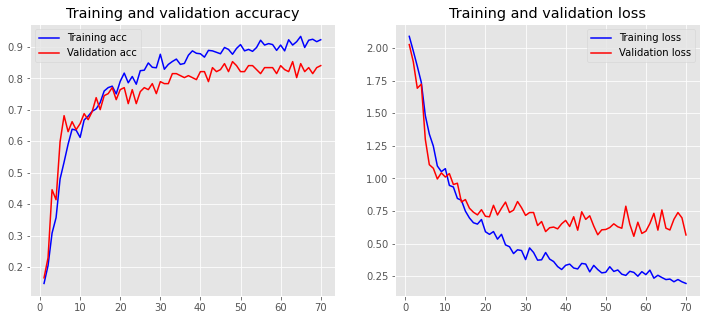

In [55]:
loss, accuracy = model1.evaluate(train_generator, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model1.evaluate(validation_generator, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

/home/ines/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


{0: 'Bear', 1: 'Duck', 2: 'Eagle', 3: 'Elephant', 4: 'Lion', 5: 'Rabbit', 6: 'Sheep', 7: 'Wolf'}
indice =  3
class =  Elephant


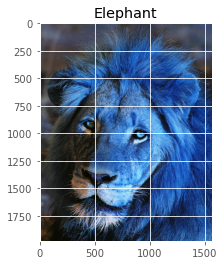

'prediction class = Elephant'

In [58]:
image = 'data2/validation/Lion/lionlh175.jpg'
prediction(model1,image)

{0: 'Bear', 1: 'Duck', 2: 'Eagle', 3: 'Elephant', 4: 'Lion', 5: 'Rabbit', 6: 'Sheep', 7: 'Wolf'}
indice =  3
class =  Elephant


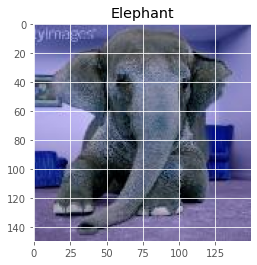

'prediction class = Elephant'

In [59]:
image = 'data2/validation/Elephant/0000000087.jpg'
prediction(model1, image)

{0: 'Bear', 1: 'Duck', 2: 'Eagle', 3: 'Elephant', 4: 'Lion', 5: 'Rabbit', 6: 'Sheep', 7: 'Wolf'}
indice =  1
class =  Duck


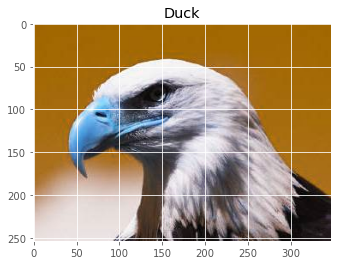

'prediction class = Duck'

In [60]:
image = 'data2/validation/Eagle/j0178767.jpg'
prediction(model1,image)

{0: 'Bear', 1: 'Duck', 2: 'Eagle', 3: 'Elephant', 4: 'Lion', 5: 'Rabbit', 6: 'Sheep', 7: 'Wolf'}
indice =  2
class =  Eagle


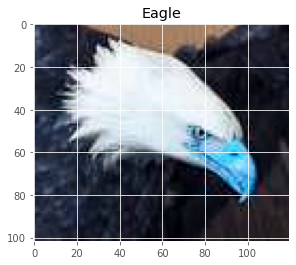

'prediction class = Eagle'

In [61]:
image = 'data2/validation/Eagle/homer-eagles-3488-1.jpg'
prediction(model1, image)

{0: 'Bear', 1: 'Duck', 2: 'Eagle', 3: 'Elephant', 4: 'Lion', 5: 'Rabbit', 6: 'Sheep', 7: 'Wolf'}
indice =  6
class =  Sheep


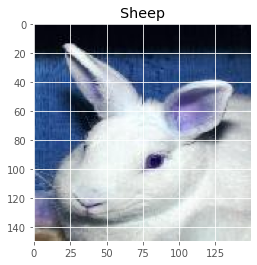

'prediction class = Sheep'

In [62]:
image = 'data2/validation/Rabbit/rabbitfrontalfrontal0086.jpg'
prediction(model1,image)

{0: 'Bear', 1: 'Duck', 2: 'Eagle', 3: 'Elephant', 4: 'Lion', 5: 'Rabbit', 6: 'Sheep', 7: 'Wolf'}
indice =  2
class =  Eagle


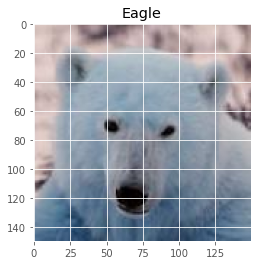

'prediction class = Eagle'

In [68]:
#image = 'data2/validation/Bear/bearfrontal0092.jpg'
#image = 'data2/validation/Bear/bearfrontal0082.jpg'
#image = 'data2/image_google/lion1.jpeg'
#image = 'data2/image_google/lion2.jpeg'
#image = 'data2/image_google/lion3.jpeg'
#image = 'data2/image_google/wolf2.jpeg'
prediction(model1, image)

# appliquer .flow() sur tout le train

In [74]:
import os

classes = ["Bear","Duck","Eagle","Elephant","Lion","Rabbit","Sheep","Wolf"]
for j in classes:
    monRepertoire = "data2/train/"+j
    for file in os.listdir(monRepertoire):
        chemin = os.path.join(monRepertoire, file)
        #print(file)
        img = load_img(chemin) # this is a PIL image
        x = img_to_array(img) # this is a Numpy array with shape (3, 150, 150)
        x = x.reshape((1,) + x.shape) # this is a Numpy array with shape (1, 3, 150, 150)
        #print(x.shape)
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir='data2/preview/'+j, save_prefix=j.lower(), save_format='jpeg'):
            i += 1
            if i > 20:
                break
print("end")

end


# preprocessing preview set

In [75]:
# preprocessing preview set
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
batch_size = 50 #16
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

#test_datagen = ImageDataGenerator(rescale=1./255)
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
'data2/preview', # this is the target directory
classes = ["Bear","Duck","Eagle","Elephant","Lion","Rabbit","Sheep","Wolf"],
target_size=(150, 150), # all images will be resized to 150x150
batch_size=batch_size,
class_mode='categorical') # since we use binary_crossentropy loss, we need binary labels

Found 12544 images belonging to 8 classes.


# model 

In [76]:
#CNN
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
# dense 
model2.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors
model2.add(Dense(64))
model2.add(Activation('relu'))
model2.add(Dropout(0.3))
model2.add(Dense(8))
model2.add(Activation('softmax'))
model2.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [82]:
def model_CNN(model, epochs = epochs):
    history = model.fit_generator(train_generator,epochs=epochs, #50,
    validation_data=validation_generator) 
    #model.save_weights('data2/first_try.h5') # always save your weights after training or during training

    loss, accuracy = model.evaluate(train_generator, verbose=False)
    print("Training Accuracy: {:.4f}".format(accuracy))
    loss, accuracy = model.evaluate(validation_generator, verbose=False)
    print("Testing Accuracy:  {:.4f}".format(accuracy))
    plot_history(history)
    return print("Training Accuracy: {:.4f}".format(accuracy)), print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/70
251/251 [==============================] - 1100s 4s/step - loss: 1.5731 - accuracy: 0.4314 - val_loss: 1.3683 - val_accuracy: 0.5223
Epoch 2/70
251/251 [==============================] - 1074s 4s/step - loss: 1.2792 - accuracy: 0.5469 - val_loss: 1.2516 - val_accuracy: 0.5924
Epoch 3/70
251/251 [==============================] - 1077s 4s/step - loss: 1.1023 - accuracy: 0.6097 - val_loss: 1.0463 - val_accuracy: 0.6306
Epoch 4/70
251/251 [==============================] - 1073s 4s/step - loss: 0.9755 - accuracy: 0.6574 - val_loss: 1.2111 - val_accuracy: 0.6369
Epoch 5/70
251/251 [==============================] - 1071s 4s/step - loss: 0.8769 - accuracy: 0.6912 - val_loss: 1.0574 - val_accuracy: 0.6433
Epoch 6/70
251/251 [==============================] - 1071s 4s/step - loss: 0.8094 - accuracy: 0.7135 - val_loss: 1.1102 - val_accuracy: 0.6497
Epoch 7/70
251/251 [==============================] - 1102s 4s/step - loss: 0.7421 - accuracy: 0.7373 - val_loss: 1.2140 - val_accuracy:

(None, None)

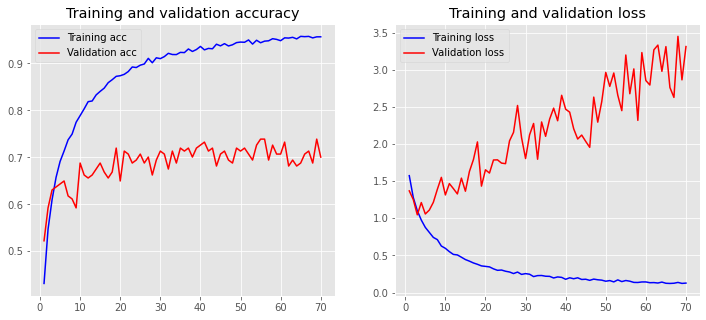

In [83]:
model_CNN(model2, epochs = 70)

{0: 'Bear', 1: 'Duck', 2: 'Eagle', 3: 'Elephant', 4: 'Lion', 5: 'Rabbit', 6: 'Sheep', 7: 'Wolf'}
indice =  4
class =  Lion


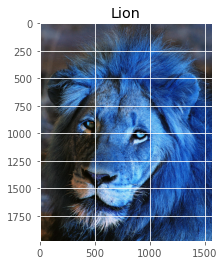

prediction class = Lion
{0: 'Bear', 1: 'Duck', 2: 'Eagle', 3: 'Elephant', 4: 'Lion', 5: 'Rabbit', 6: 'Sheep', 7: 'Wolf'}
indice =  4
class =  Lion


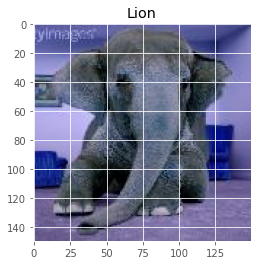

prediction class = Lion
{0: 'Bear', 1: 'Duck', 2: 'Eagle', 3: 'Elephant', 4: 'Lion', 5: 'Rabbit', 6: 'Sheep', 7: 'Wolf'}
indice =  5
class =  Rabbit


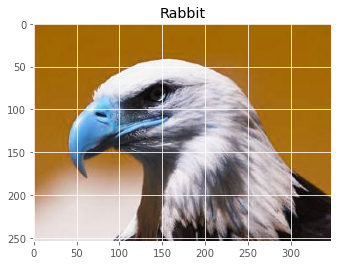

prediction class = Rabbit
{0: 'Bear', 1: 'Duck', 2: 'Eagle', 3: 'Elephant', 4: 'Lion', 5: 'Rabbit', 6: 'Sheep', 7: 'Wolf'}
indice =  6
class =  Sheep


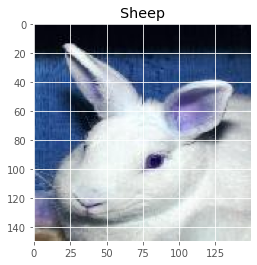

prediction class = Sheep
{0: 'Bear', 1: 'Duck', 2: 'Eagle', 3: 'Elephant', 4: 'Lion', 5: 'Rabbit', 6: 'Sheep', 7: 'Wolf'}
indice =  6
class =  Sheep


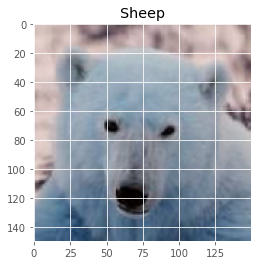

prediction class = Sheep
{0: 'Bear', 1: 'Duck', 2: 'Eagle', 3: 'Elephant', 4: 'Lion', 5: 'Rabbit', 6: 'Sheep', 7: 'Wolf'}
indice =  4
class =  Lion


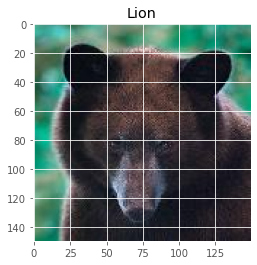

prediction class = Lion
{0: 'Bear', 1: 'Duck', 2: 'Eagle', 3: 'Elephant', 4: 'Lion', 5: 'Rabbit', 6: 'Sheep', 7: 'Wolf'}
indice =  4
class =  Lion


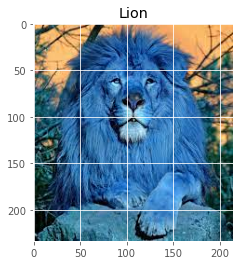

prediction class = Lion
{0: 'Bear', 1: 'Duck', 2: 'Eagle', 3: 'Elephant', 4: 'Lion', 5: 'Rabbit', 6: 'Sheep', 7: 'Wolf'}
indice =  4
class =  Lion


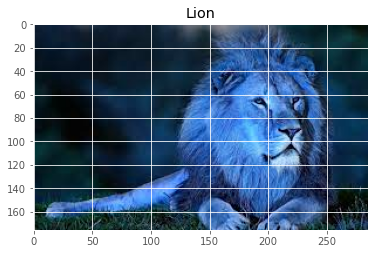

prediction class = Lion
{0: 'Bear', 1: 'Duck', 2: 'Eagle', 3: 'Elephant', 4: 'Lion', 5: 'Rabbit', 6: 'Sheep', 7: 'Wolf'}
indice =  6
class =  Sheep


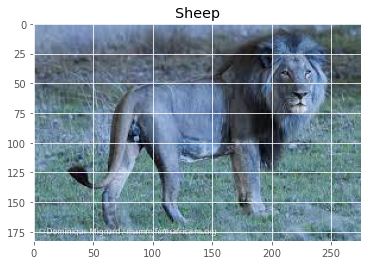

prediction class = Sheep
{0: 'Bear', 1: 'Duck', 2: 'Eagle', 3: 'Elephant', 4: 'Lion', 5: 'Rabbit', 6: 'Sheep', 7: 'Wolf'}
indice =  1
class =  Duck


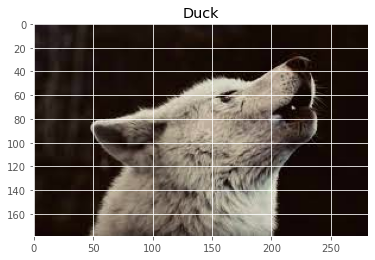

prediction class = Duck
{0: 'Bear', 1: 'Duck', 2: 'Eagle', 3: 'Elephant', 4: 'Lion', 5: 'Rabbit', 6: 'Sheep', 7: 'Wolf'}
indice =  6
class =  Sheep


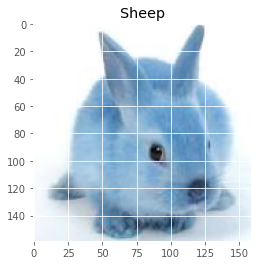

prediction class = Sheep
{0: 'Bear', 1: 'Duck', 2: 'Eagle', 3: 'Elephant', 4: 'Lion', 5: 'Rabbit', 6: 'Sheep', 7: 'Wolf'}
indice =  6
class =  Sheep


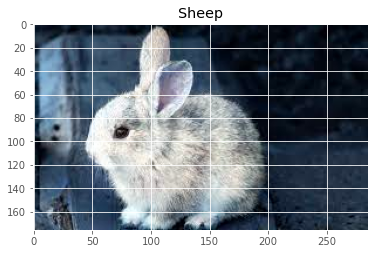

prediction class = Sheep
{0: 'Bear', 1: 'Duck', 2: 'Eagle', 3: 'Elephant', 4: 'Lion', 5: 'Rabbit', 6: 'Sheep', 7: 'Wolf'}
indice =  6
class =  Sheep


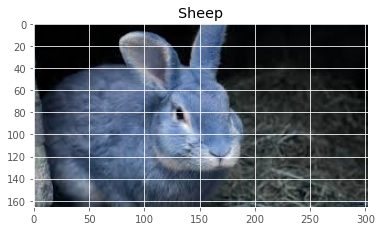

prediction class = Sheep
{0: 'Bear', 1: 'Duck', 2: 'Eagle', 3: 'Elephant', 4: 'Lion', 5: 'Rabbit', 6: 'Sheep', 7: 'Wolf'}
indice =  6
class =  Sheep


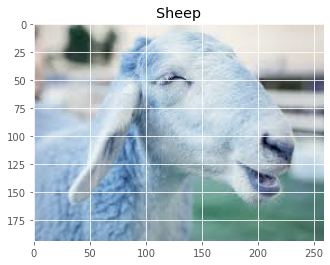

prediction class = Sheep
{0: 'Bear', 1: 'Duck', 2: 'Eagle', 3: 'Elephant', 4: 'Lion', 5: 'Rabbit', 6: 'Sheep', 7: 'Wolf'}
indice =  2
class =  Eagle


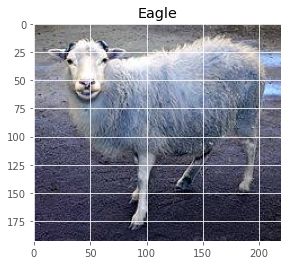

prediction class = Eagle


In [86]:
image1 = 'data2/validation/Lion/lionlh175.jpg'
image2 = 'data2/validation/Elephant/0000000087.jpg'
image3 = 'data2/validation/Eagle/j0178767.jpg'
image4 = 'data2/validation/Eagle/homer-eagles-3488-1.jpg'
image4 = 'data2/validation/Rabbit/rabbitfrontalfrontal0086.jpg'
image5 = 'data2/validation/Bear/bearfrontal0092.jpg'
image6 = 'data2/validation/Bear/bearfrontal0082.jpg'
image7 = 'data2/image_google/lion1.jpeg'
image8 = 'data2/image_google/lion2.jpeg'
image9 = 'data2/image_google/lion3.jpeg'
image10 = 'data2/image_google/wolf2.jpeg'
image11 = 'data2/image_google/rabbit1.jpeg'
image12 = 'data2/image_google/rabbit2.jpeg'
image13 = 'data2/image_google/rabbit3.jpeg'
image14 = 'data2/image_google/sheep1.jpeg'
image15 = 'data2/image_google/sheep2.jpeg'

images = [image1, image2, image3, image4, image5, image6, image7, image8, image9, image10, image11, image12, image13, image14, image15]
for image in images:
    print(prediction(model2, image))